# Data Collection and Cleaning and Minor EDA

## Data Collection

For step 1 of the project, we need to collect all the tweets from the republican and democrat Senators + Donald Trump and Mike Pence (President and VP).  To do this, we will use the Twitter API and Tweepy to scrap all tweets shown on their Twitter for the last 7 days or the previous 200 tweets (Whichever ends first, This is a Limited by Twitter API). 

In [17]:
import os 
import pandas as pd
import tweepy
import numpy as np

politican_twitter_handle  = pd.read_excel('Politican_twitter_handle.xlsx')
politican_twitter_handle.head()

State                Name    Twitter_name Party
0   AK      Lisa Murkowski    lisamurkowski     R
1   AK        Dan Sullivan   SenDanSullivan     R
2   AL          Doug Jones     SenDougJones     D
3   AL   Richard C. Shelby        SenShelby     R
4   AR        John Boozman      JohnBoozman     R

The script below allows you to access your Twitter account and scrape their tweets.  The list of Senators was from the internet (https://www.sbh4all.org/wp-content/uploads/2019/04/116th-Congress-Twitter-Handles.pdf)

In [18]:
# consumer_key = ""
# consumer_secret = ""

# politican = politican_twitter_handle.Name
# username = politican_twitter_handle.Twitter_name
# party = politican_twitter_handle.Party
# states = politican_twitter_handle.State

# def get_politican_tweet(username, number_of_tweets):
#     auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
#     # Calling api 
#     api = tweepy.API(auth) 
#     tweets = api.user_timeline(screen_name=username, count = number_of_tweets) 
#     tmp=[]  
#     tweets_for_csv = [tweet.text for tweet in tweets] # CSV file created  
#     for j in tweets_for_csv:     
#         # Appending tweets to the empty array tmp 
#         tmp.append(j)  
#     return tmp
#     # Printing the tweets 

# final_df = pd.DataFrame()

# for name, twitter_name, party, state in zip(politican,username, party, states):
#     tweet = get_politican_tweet(twitter_name, 200)
#     temp_df = pd.DataFrame({'tweet':tweet})
#     temp_df['politican'] = name
#     temp_df['Party'] = party 
#     temp_df['State'] = state
#     final_df = final_df.append(temp_df)
    
# final_df


The Data looks good. Lets save it!

In [19]:
os.getcwd()
one_level_up = os.path.dirname(os.getcwd())
#final_df.to_csv(one_level_up + '\\data\\raw\\09292020_raw_tweets.csv')
final_df = pd.read_csv(one_level_up + '\\data\\raw\\09122020_raw_tweets.csv', index_col= 0)
final_df

tweet        politican Party  \
0    Congrats to Petersburg Medical Center CEO Phil...  Lisa Murkowski      R   
1    The changes made by this legislation will go a...  Lisa Murkowski      R   
2    I’m proud to introduce the Tribal Health Data ...  Lisa Murkowski      R   
3    American Indian &amp; Alaska Native communitie...  Lisa Murkowski      R   
4    Congrats to Alaskans Eddy Falcon Jr. and Tafil...  Lisa Murkowski      R   
..                                                 ...              ...   ...   
195  Just stay focused, folks.\n\nLet’s get to work...        Joe Biden     D   
196  Donald Trump is unfit to lead our nation. But ...        Joe Biden     D   
197  .@realDonaldTrump it didn’t have to be this ba...        Joe Biden     D   
198  The only person responsible for our failed COV...        Joe Biden     D   
199  Together, united in our love for America and e...        Joe Biden     D   

    State  
0     AK   
1     AK   
2     AK   
3     AK   
4     AK   
..    ...  
195     P  
196     P  
197     P  
198     P  
199     P  

[20597 rows x 4 columns]

Now we have all the data, let's add in additional columns that may or may not helps us without analysis.  Let's add in their party affiliation and whether if those tweets are retweets or not

In [20]:
#party = {'Trump':'R','Biden':'D','Sanders':'D','Warren':'D','McConell':'R','Cruz':'R','Pence':'R'}
#final_df['party'] = final_df.politican.map(party)
final_df['retweet'] = final_df['tweet'].str.contains('RT')

#pence_df  = final_df[final_df['politican'] == 'Pence'] #and final_df['tweet'].str.contains('RT @Mike_Pence')
#pence_df['retweet'] = ~pence_df['tweet'].str.contains('RT @Mike_Pence')
#pence_df['tweet'] = pence_df['tweet'].str.replace('RT @Mike_Pence: ','')
#final_df = final_df[final_df['politican'] != 'Pence']
#final_df = final_df.append(pence_df)

#final_df = final_df.reset_index(drop = True)
final_df

tweet        politican Party  \
0    Congrats to Petersburg Medical Center CEO Phil...  Lisa Murkowski      R   
1    The changes made by this legislation will go a...  Lisa Murkowski      R   
2    I’m proud to introduce the Tribal Health Data ...  Lisa Murkowski      R   
3    American Indian &amp; Alaska Native communitie...  Lisa Murkowski      R   
4    Congrats to Alaskans Eddy Falcon Jr. and Tafil...  Lisa Murkowski      R   
..                                                 ...              ...   ...   
195  Just stay focused, folks.\n\nLet’s get to work...        Joe Biden     D   
196  Donald Trump is unfit to lead our nation. But ...        Joe Biden     D   
197  .@realDonaldTrump it didn’t have to be this ba...        Joe Biden     D   
198  The only person responsible for our failed COV...        Joe Biden     D   
199  Together, united in our love for America and e...        Joe Biden     D   

    State  retweet  
0     AK     False  
1     AK     False  
2     AK     False  
3     AK     False  
4     AK     False  
..    ...      ...  
195     P    False  
196     P    False  
197     P    False  
198     P    False  
199     P    False  

[20597 rows x 5 columns]

Okay, now let's add in readability score and take a look to see and look at the readability score statistics.  

## Add in readability score (Feature Engineering)

In [21]:
import textstat
#print(final_df.loc[0,'tweet'])
#textstat.automated_readability_index(final_df.loc[0,'tweet'])


The readability score appear to be way off.  With the maximium score of 24 having some like 87 is really high.  This means we probably need to clean our tweets before doing vectorization. 

By looking at some of the tweet, I notice we need to get rid of https linkes, emoji.  So why don't we do this first

In [22]:
final_df['tweet_web_r'] = final_df.tweet.str.replace(r'http\S+','')
final_df.head()

tweet        politican Party  \
0  Congrats to Petersburg Medical Center CEO Phil...  Lisa Murkowski      R   
1  The changes made by this legislation will go a...  Lisa Murkowski      R   
2  I’m proud to introduce the Tribal Health Data ...  Lisa Murkowski      R   
3  American Indian &amp; Alaska Native communitie...  Lisa Murkowski      R   
4  Congrats to Alaskans Eddy Falcon Jr. and Tafil...  Lisa Murkowski      R   

  State  retweet                                        tweet_web_r  
0   AK     False  Congrats to Petersburg Medical Center CEO Phil...  
1   AK     False  The changes made by this legislation will go a...  
2   AK     False  I’m proud to introduce the Tribal Health Data ...  
3   AK     False  American Indian &amp; Alaska Native communitie...  
4   AK     False  Congrats to Alaskans Eddy Falcon Jr. and Tafil...

OK, let's add in the readability score and graph the general trend in histograms.

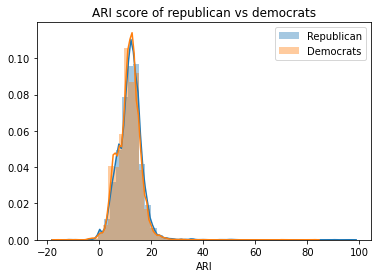

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

final_df['ARI'] = final_df.tweet_web_r.apply(lambda x:textstat.automated_readability_index(x))
#final_df.tweet_web_r.apply(lambda x:textstat.automated_readability_index(x)).hist()
sns.distplot(final_df[final_df['Party']=='R'].ARI, label = 'Republican')
sns.distplot(final_df[final_df['Party']=='D'].ARI, label = 'Democrats')
plt.title('ARI score of republican vs democrats')
plt.legend()


ARI: https://en.wikipedia.org/wiki/Automated_readability_index

The distribution pretty good because the ARI index is ranging from 1 - 24.  I think we captured a good range here.  But let's try another method and see how it looks.

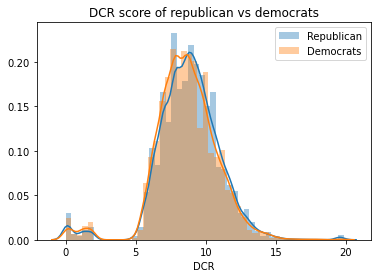

In [24]:
final_df['DCR'] = final_df.tweet_web_r.apply(lambda x:textstat.dale_chall_readability_score(x))
sns.distplot(final_df[final_df['Party']=='R'].DCR, label = 'Republican')
sns.distplot(final_df[final_df['Party']=='D'].DCR, label = 'Democrats')
plt.title('DCR score of republican vs democrats')
plt.legend()


Dale Chall Readability (DCR) – it uses formula uses a list of 3000 words that fourth grade American can reliably understand and using this list to see how difficult the sentence are.

https://en.wikipedia.org/wiki/Dale%E2%80%93Chall_readability_formula

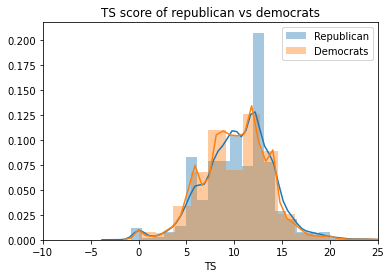

In [25]:
final_df['TS'] = final_df.tweet_web_r.apply(lambda x:textstat.text_standard(x,float_output =True))
sns.distplot(final_df[final_df['Party']=='R'].TS, label = 'Republican')
sns.distplot(final_df[final_df['Party']=='D'].TS, label = 'Democrats')
plt.title('TS score of republican vs democrats')
plt.legend()
plt.xlim(-10,25)
plt.savefig(one_level_up + '\\report_graph\\Senate_TS_Score')


The final readability test Text Standard is base on all the methods in the Textstats package.  Now we quantify the readability of these tweet lets see if there is a trend between the leaders

In [26]:
major_leaders = ['Mitch McConnell','Mike Pence','Donald Trump', 'Joe Biden', 'Bernard Sanders','Kamala D. Harris', 
                 'Elizabeth Warren','Ted Cruz' ]
final_df['politican'] = final_df['politican'].str.rstrip()

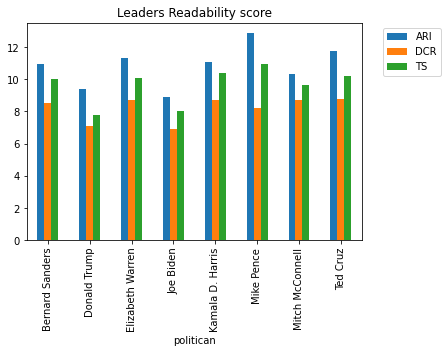

In [27]:
major_leaders_df = final_df[final_df['politican'].isin(major_leaders)]
major_leaders_df.groupby('politican')[['ARI','DCR','TS']].mean().plot(kind = 'bar', title = 'Leaders Readability score')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig(one_level_up + '\\report_graph\\leaders_readability_score')


According to their Median readability score, no conclusion is drawn.  However, I think it is quite interesting that Joe Biden and Donald Trump have the lowest readability score in general.  Let check if there are any outlier using the describe method.

In [28]:
major_leaders_df.groupby('politican')[['ARI','DCR','TS']].describe().T

politican  Bernard Sanders  Donald Trump  Elizabeth Warren   Joe Biden  \
ARI count       200.000000    200.000000        200.000000  200.000000   
    mean         10.945500      9.421500         11.320500    8.871500   
    std           3.975551      7.132443          4.179602    4.045661   
    min          -0.300000     -4.600000          2.200000   -3.500000   
    25%           8.700000      4.850000          8.325000    6.000000   
    50%          11.400000      9.650000         11.600000    9.800000   
    75%          13.500000     13.350000         13.500000   11.400000   
    max          22.800000     52.600000         31.500000   24.000000   
DCR count       200.000000    200.000000        200.000000  200.000000   
    mean          8.504900      7.112500          8.695150    6.939200   
    std           1.947870      3.982144          1.829477    2.780103   
    min           1.090000      0.000000          1.780000    0.100000   
    25%           7.285000      6.240000          7.395000    6.157500   
    50%           8.440000      7.675000          8.730000    7.060000   
    75%           9.760000      9.420000          9.790000    8.475000   
    max          14.000000     19.530000         14.000000   19.580000   
TS  count       200.000000    200.000000        200.000000  200.000000   
    mean         10.030000      7.775000         10.070000    8.030000   
    std           3.359394      5.208649          3.106987    3.274555   
    min           0.000000      0.000000          2.000000    0.000000   
    25%           8.000000      4.000000          8.000000    6.000000   
    50%          10.000000      8.000000         10.000000    8.000000   
    75%          12.000000     11.000000         12.000000   10.000000   
    max          20.000000     27.000000         20.000000   16.000000   

politican  Kamala D. Harris  Mike Pence  Mitch McConnell    Ted Cruz  
ARI count        200.000000  200.000000       200.000000  200.000000  
    mean          11.105000   12.886500        10.348500   11.761000  
    std            4.361593    5.227774         3.801071    4.101609  
    min            1.600000   -0.200000         2.600000    2.300000  
    25%            8.050000    9.850000         7.550000    9.075000  
    50%           11.200000   13.500000        10.600000   12.400000  
    75%           13.500000   16.000000        13.500000   14.425000  
    max           28.600000   31.200000        20.200000   26.200000  
DCR count        200.000000  200.000000       200.000000  200.000000  
    mean           8.733350    8.221800         8.699800    8.788700  
    std            1.975621    2.770789         1.983977    2.051736  
    min            1.260000    0.000000         1.260000    0.050000  
    25%            7.577500    7.132500         7.430000    7.600000  
    50%            8.490000    8.455000         8.895000    8.870000  
    75%            9.975000    9.440000         9.790000    9.940000  
    max           14.910000   15.680000        13.850000   14.760000  
TS  count        200.000000  200.000000       200.000000  200.000000  
    mean          10.390000   10.935000         9.640000   10.215000  
    std            3.706290    4.539140         3.067155    3.515761  
    min            3.000000    0.000000         3.000000    0.000000  
    25%            8.000000    9.000000         7.000000    8.000000  
    50%           10.000000   11.000000        10.000000   10.000000  
    75%           13.000000   14.000000        12.000000   13.000000  
    max           24.000000   22.000000        20.000000   20.000000

There are not any outlier.  We will just take them as they are.  We will remove the Hyperlink now.  Since hyperlink are not part of the speech, we will remove them

In [29]:
final_df.replace('', np.nan,inplace = True)
final_df.dropna(subset = ['tweet_web_r'],inplace = True)
final_df

tweet       politican Party  \
0    Congrats to Petersburg Medical Center CEO Phil...  Lisa Murkowski     R   
1    The changes made by this legislation will go a...  Lisa Murkowski     R   
2    I’m proud to introduce the Tribal Health Data ...  Lisa Murkowski     R   
3    American Indian &amp; Alaska Native communitie...  Lisa Murkowski     R   
4    Congrats to Alaskans Eddy Falcon Jr. and Tafil...  Lisa Murkowski     R   
..                                                 ...             ...   ...   
195  Just stay focused, folks.\n\nLet’s get to work...       Joe Biden     D   
196  Donald Trump is unfit to lead our nation. But ...       Joe Biden     D   
197  .@realDonaldTrump it didn’t have to be this ba...       Joe Biden     D   
198  The only person responsible for our failed COV...       Joe Biden     D   
199  Together, united in our love for America and e...       Joe Biden     D   

    State  retweet                                        tweet_web_r   ARI  \
0     AK     False  Congrats to Petersburg Medical Center CEO Phil...  13.5   
1     AK     False  The changes made by this legislation will go a...  10.6   
2     AK     False  I’m proud to introduce the Tribal Health Data ...  14.8   
3     AK     False  American Indian &amp; Alaska Native communitie...  11.6   
4     AK     False  Congrats to Alaskans Eddy Falcon Jr. and Tafil...  11.4   
..    ...      ...                                                ...   ...   
195     P    False  Just stay focused, folks.\n\nLet’s get to work...   4.9   
196     P    False  Donald Trump is unfit to lead our nation. But ...   1.4   
197     P    False  .@realDonaldTrump it didn’t have to be this bad.    6.7   
198     P    False  The only person responsible for our failed COV...   9.3   
199     P    False  Together, united in our love for America and e...  11.4   

       DCR    TS  
0     9.79  13.0  
1     8.44  12.0  
2    10.98  10.0  
3     9.63  10.0  
4    10.16  10.0  
..     ...   ...  
195   6.78   2.0  
196   6.99   3.0  
197   7.98   8.0  
198   8.18   9.0  
199   6.21  12.0  

[20506 rows x 9 columns]

Only two rows are HTTP, so there shouldn't be too much change to the score we get above. 

## Word Cloud Generation (EDA)

To do more Exploratory Data Analysis, we will generate a word cloud to see some of the leaders' most common words and do a quick view to see if there is anything noticeable.  Also, we have generated two word clouds for each leader, before and after retweets removal.  The reasoning behind this is because retweet may share the sentiment that the leaders are trying to convey.  First, let's see the word cloud with retweets.

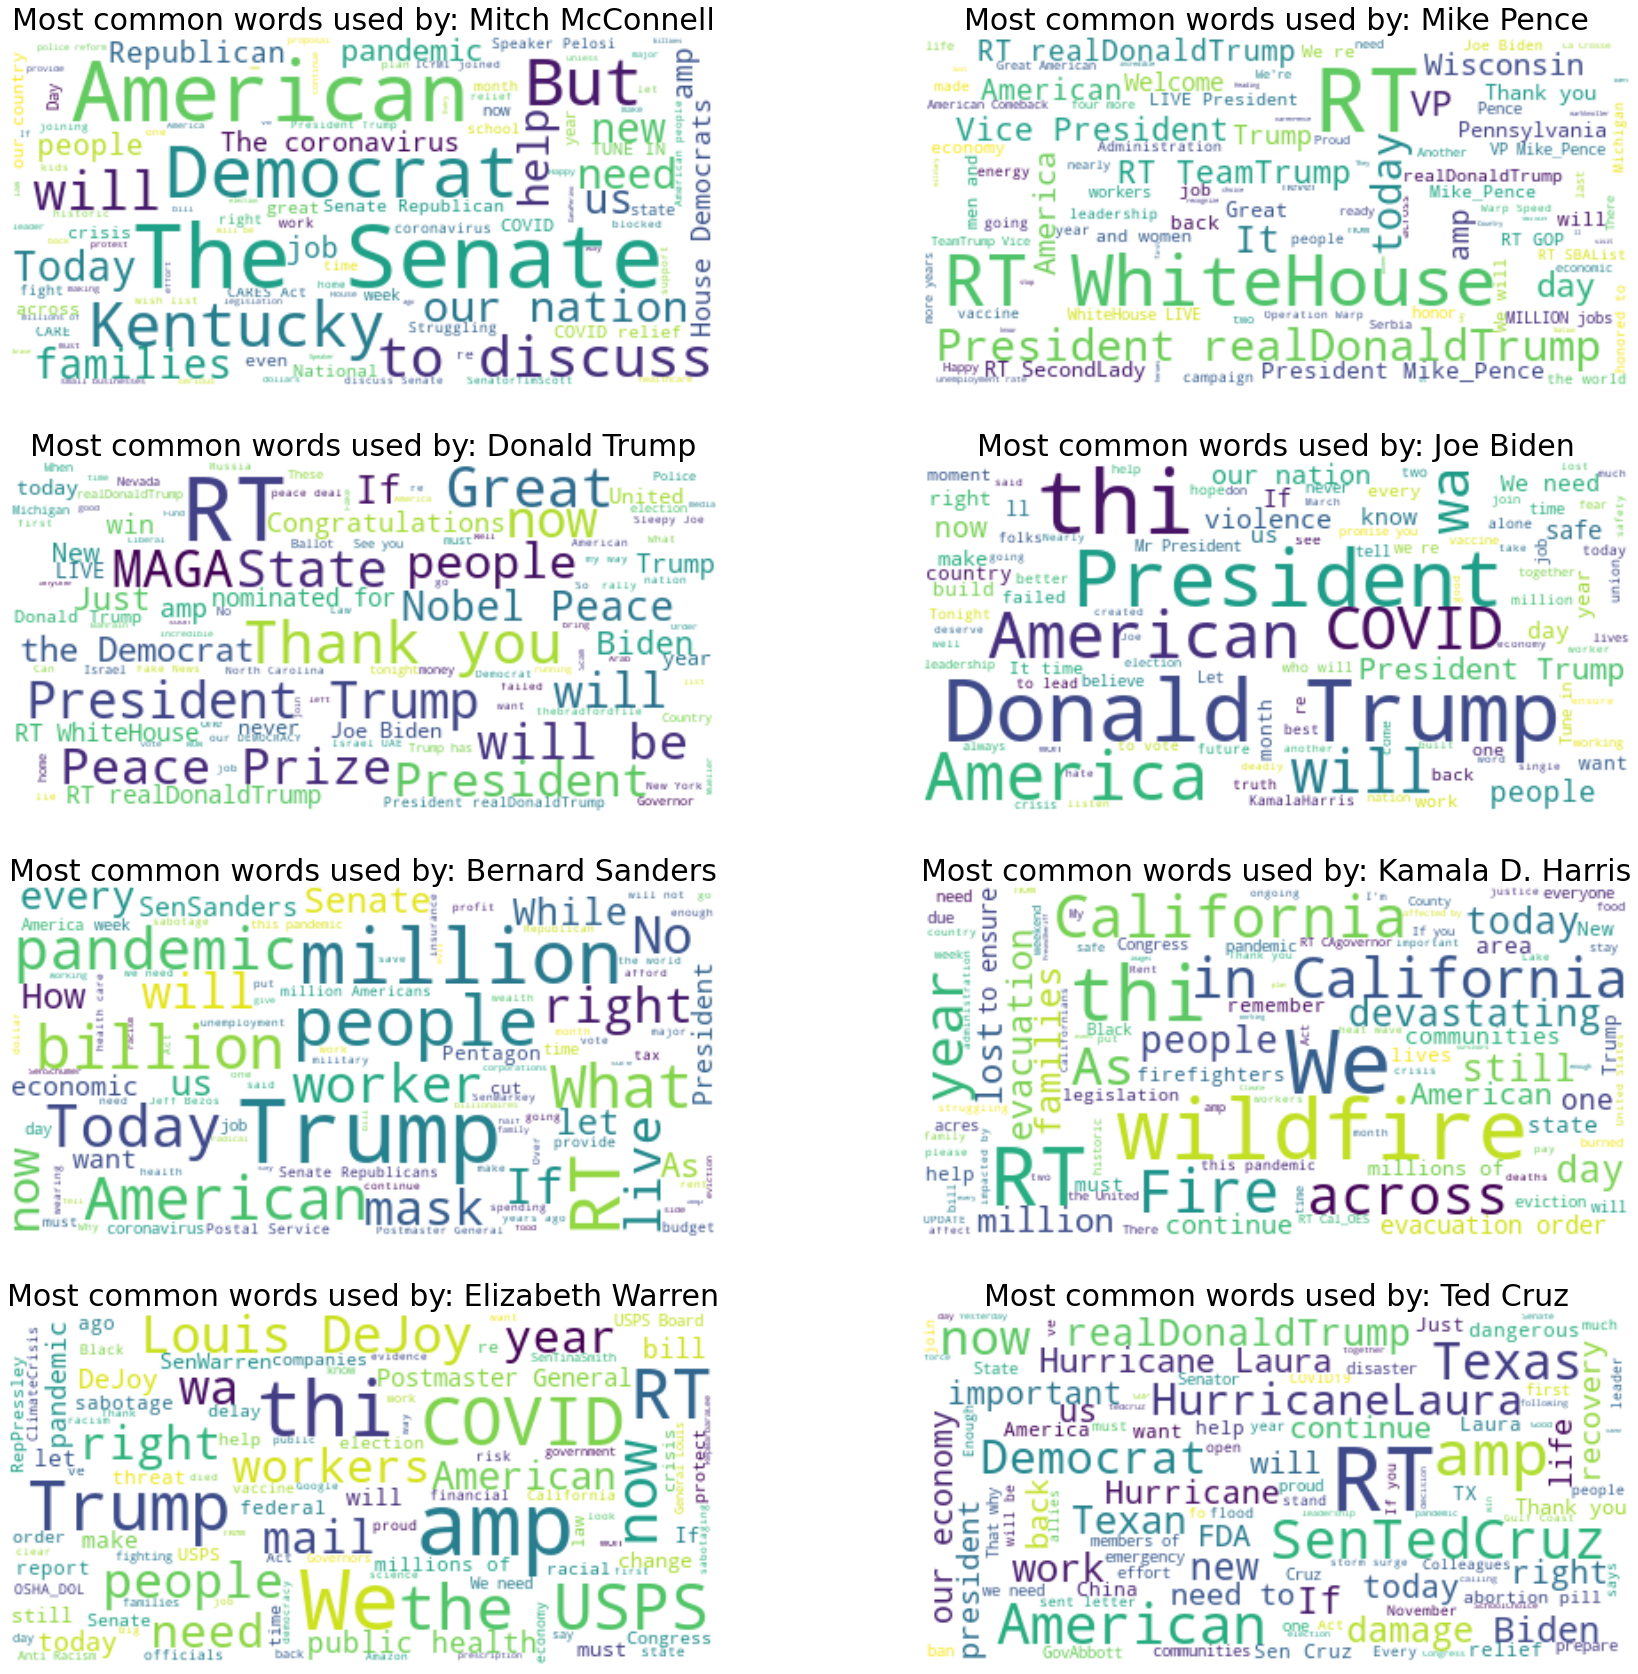

In [30]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
%matplotlib inline

politican = ['Mitch McConnell','Mike Pence','Donald Trump', 'Joe Biden', 'Bernard Sanders','Kamala D. Harris', 
                 'Elizabeth Warren','Ted Cruz' ]
plot = []
for idx, name in enumerate(politican):
    politican_df = final_df[final_df['politican'] == name] 
    politican_df_tweet = " ".join(review for review in politican_df.tweet_web_r)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(politican_df_tweet)
    plot.append(wordcloud)
 
fig, axs = plt.subplots(4, 2 , figsize  = (30,30))

for i in range(4):
    for j in range(2):
        if i == 3 and j == 2: 
            break 
        axs[i,j].imshow(plot[i*2+j], interpolation='bilinear')
        axs[i,j].axis("off")
        axs[i,j].set_title('Most common words used by: ' +politican[i*2+j],fontsize=30)
        #axs[i,j].show()


It is pretty awesome to see how words varied between the leaders.  Warren uses Covid and pandemic a lot, Cruz uses china and Chinese a lot. Interesting here is that Biden and McConnell don't retweet a lot.  It seems like democratic leaders criticized Trump a lot.  America is a common word for most of the politician.  The Senator also refer to their home state a lot.  MAGA (Make America Great Again) is exclusively on Trumps tweets only.  Bernie Sanders uses million and billion, which is not commonly used by other leaders.  Base on our word clouds, it seems like we have some assurance that our model could work.     


## Additional Data Cleaning (Punctuation/Segmenation/Retweet Removal)
Now let do additional data cleaning.  Let's start by taking out all the punctions withing the dataframe

In [31]:
import string
import re

pattern = r"[{}]".format(string.punctuation)
#print(pattern + '\'')

#final_df.tweet_web_r  = final_df.tweet_web_r.str.replace(string.punction, '')
final_df['punct'] = final_df.tweet_web_r.str.replace(pattern, '')
final_df['punct'] = final_df.punct.str.replace("’", "")
final_df.punct
#final_df.iloc[6].punct.replace()

0      Congrats to Petersburg Medical Center CEO Phil...
1      The changes made by this legislation will go a...
2      Im proud to introduce the Tribal Health Data I...
3      American Indian amp Alaska Native communities ...
4      Congrats to Alaskans Eddy Falcon Jr and Tafili...
                             ...                        
195    Just stay focused folks\n\nLets get to work Jo...
196    Donald Trump is unfit to lead our nation But d...
197        realDonaldTrump it didnt have to be this bad 
198    The only person responsible for our failed COV...
199    Together united in our love for America and ea...
Name: punct, Length: 20506, dtype: object

Now lets tokenized each tweet

In [32]:
import nltk
from nltk.tokenize import word_tokenize

#nltk.download('punkt')

#final_df.punct[0].split(' ')
final_df['token'] = final_df.punct.apply(lambda x: word_tokenize(x))
final_df.token

0      [Congrats, to, Petersburg, Medical, Center, CE...
1      [The, changes, made, by, this, legislation, wi...
2      [Im, proud, to, introduce, the, Tribal, Health...
3      [American, Indian, amp, Alaska, Native, commun...
4      [Congrats, to, Alaskans, Eddy, Falcon, Jr, and...
                             ...                        
195    [Just, stay, focused, folks, Lets, get, to, wo...
196    [Donald, Trump, is, unfit, to, lead, our, nati...
197    [realDonaldTrump, it, didnt, have, to, be, thi...
198    [The, only, person, responsible, for, our, fai...
199    [Together, united, in, our, love, for, America...
Name: token, Length: 20506, dtype: object

ok...  Let's talk about stop word, which are commonly used words in any given language.  I am not sure if I want to remove them just yet.  However, I think it is quite important to count them.

After consideration, we are going to see what does the readability value and word cloud looks like without the retweet

In [33]:
df_noRT = final_df[final_df['retweet'] == False]
df_noRT

tweet       politican Party  \
0    Congrats to Petersburg Medical Center CEO Phil...  Lisa Murkowski     R   
1    The changes made by this legislation will go a...  Lisa Murkowski     R   
2    I’m proud to introduce the Tribal Health Data ...  Lisa Murkowski     R   
3    American Indian &amp; Alaska Native communitie...  Lisa Murkowski     R   
4    Congrats to Alaskans Eddy Falcon Jr. and Tafil...  Lisa Murkowski     R   
..                                                 ...             ...   ...   
195  Just stay focused, folks.\n\nLet’s get to work...       Joe Biden     D   
196  Donald Trump is unfit to lead our nation. But ...       Joe Biden     D   
197  .@realDonaldTrump it didn’t have to be this ba...       Joe Biden     D   
198  The only person responsible for our failed COV...       Joe Biden     D   
199  Together, united in our love for America and e...       Joe Biden     D   

    State  retweet                                        tweet_web_r   ARI  \
0     AK     False  Congrats to Petersburg Medical Center CEO Phil...  13.5   
1     AK     False  The changes made by this legislation will go a...  10.6   
2     AK     False  I’m proud to introduce the Tribal Health Data ...  14.8   
3     AK     False  American Indian &amp; Alaska Native communitie...  11.6   
4     AK     False  Congrats to Alaskans Eddy Falcon Jr. and Tafil...  11.4   
..    ...      ...                                                ...   ...   
195     P    False  Just stay focused, folks.\n\nLet’s get to work...   4.9   
196     P    False  Donald Trump is unfit to lead our nation. But ...   1.4   
197     P    False  .@realDonaldTrump it didn’t have to be this bad.    6.7   
198     P    False  The only person responsible for our failed COV...   9.3   
199     P    False  Together, united in our love for America and e...  11.4   

       DCR    TS                                              punct  \
0     9.79  13.0  Congrats to Petersburg Medical Center CEO Phil...   
1     8.44  12.0  The changes made by this legislation will go a...   
2    10.98  10.0  Im proud to introduce the Tribal Health Data I...   
3     9.63  10.0  American Indian amp Alaska Native communities ...   
4    10.16  10.0  Congrats to Alaskans Eddy Falcon Jr and Tafili...   
..     ...   ...                                                ...   
195   6.78   2.0  Just stay focused folks\n\nLets get to work Jo...   
196   6.99   3.0  Donald Trump is unfit to lead our nation But d...   
197   7.98   8.0      realDonaldTrump it didnt have to be this bad    
198   8.18   9.0  The only person responsible for our failed COV...   
199   6.21  12.0  Together united in our love for America and ea...   

                                                 token  
0    [Congrats, to, Petersburg, Medical, Center, CE...  
1    [The, changes, made, by, this, legislation, wi...  
2    [Im, proud, to, introduce, the, Tribal, Health...  
3    [American, Indian, amp, Alaska, Native, commun...  
4    [Congrats, to, Alaskans, Eddy, Falcon, Jr, and...  
..                                                 ...  
195  [Just, stay, focused, folks, Lets, get, to, wo...  
196  [Donald, Trump, is, unfit, to, lead, our, nati...  
197  [realDonaldTrump, it, didnt, have, to, be, thi...  
198  [The, only, person, responsible, for, our, fai...  
199  [Together, united, in, our, love, for, America...  

[17124 rows x 11 columns]

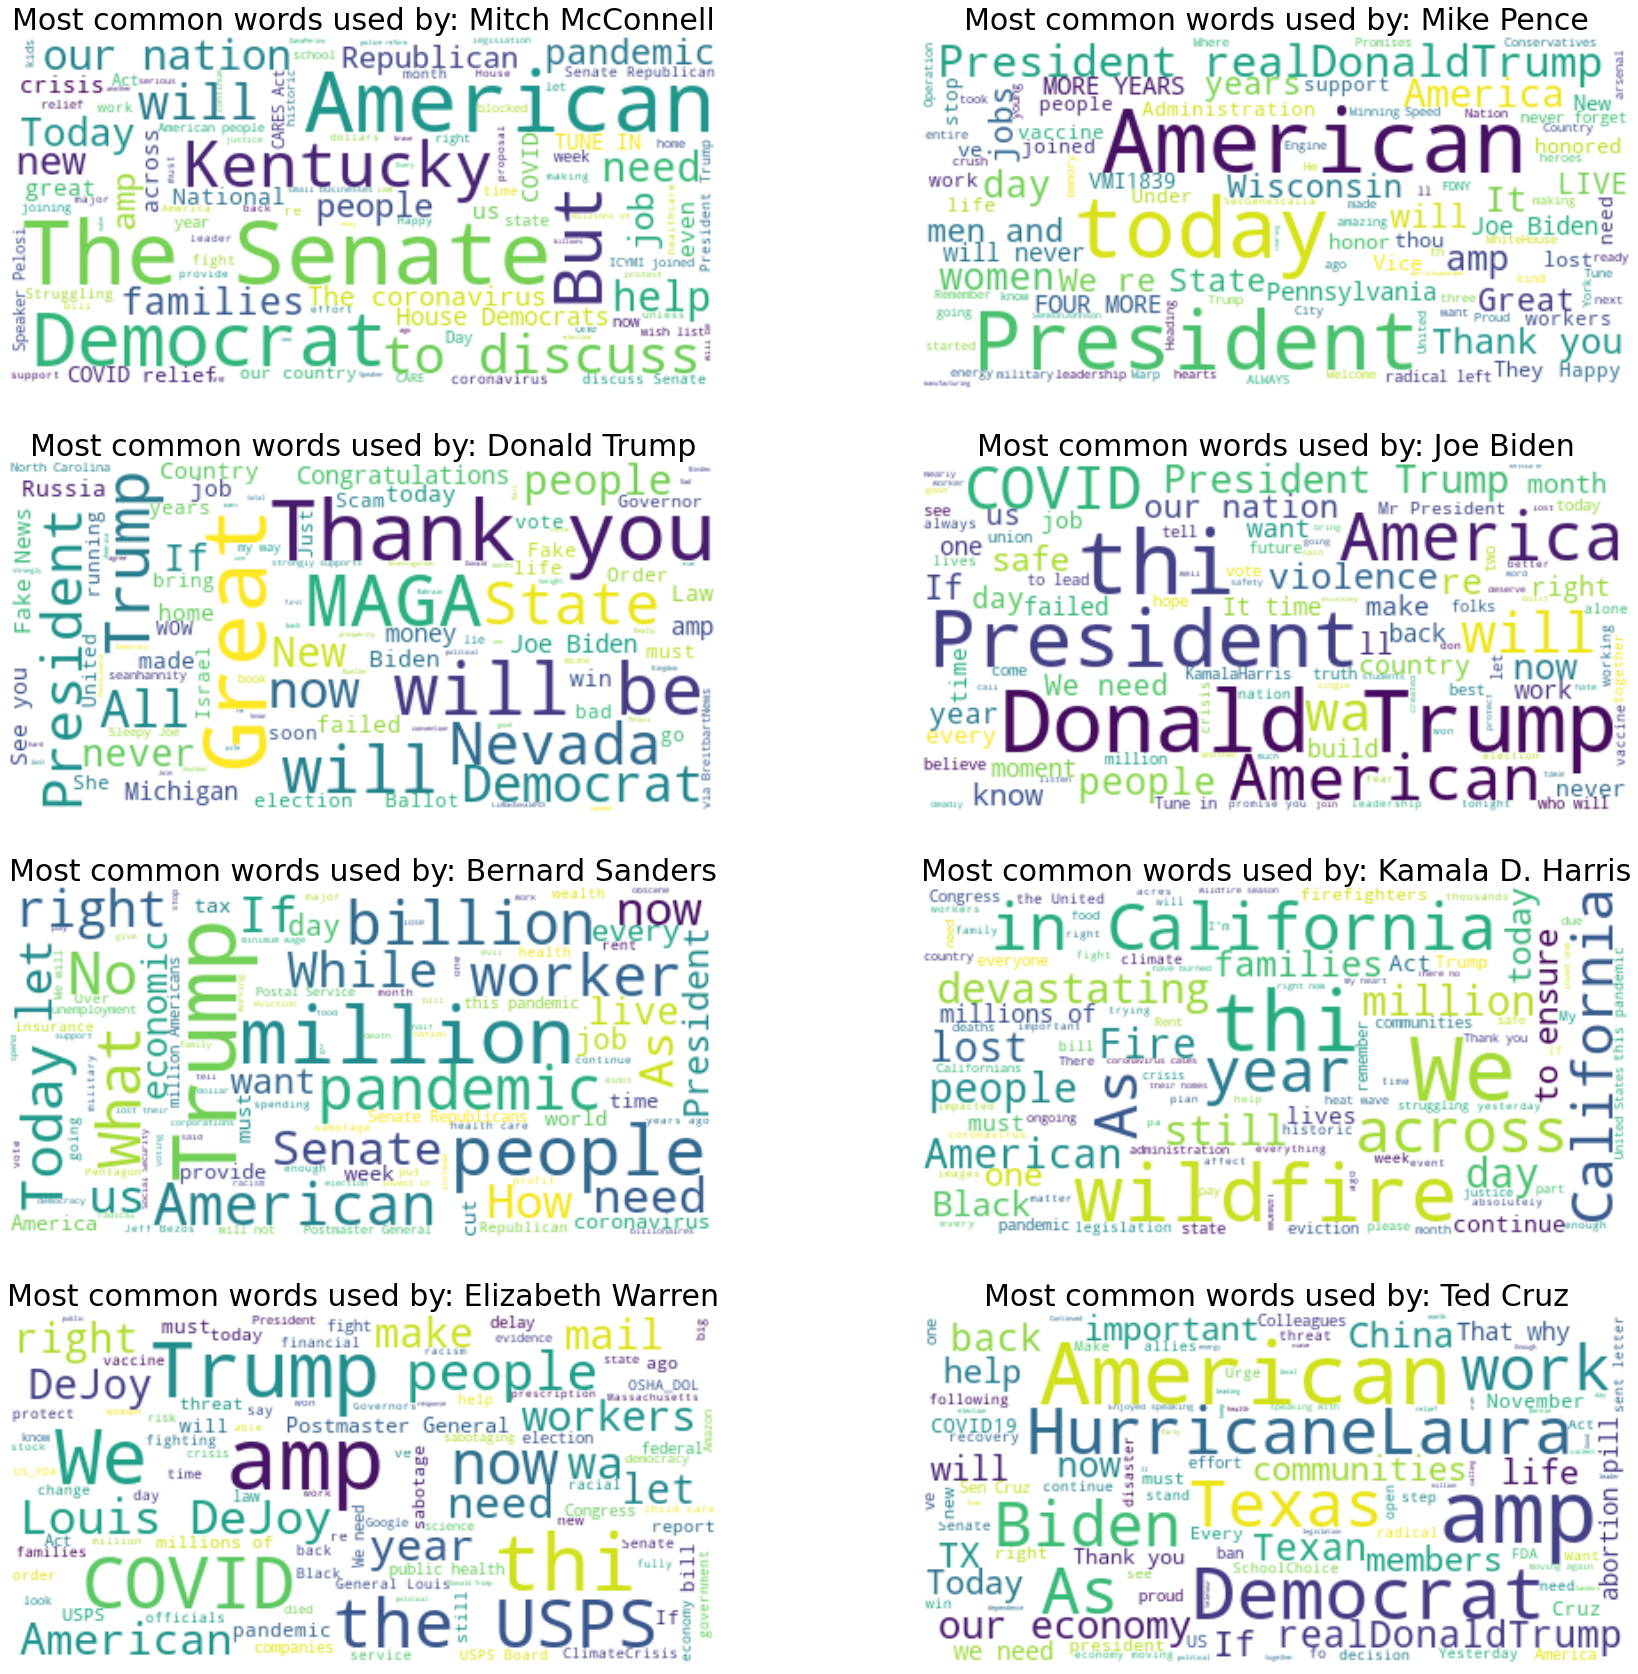

In [34]:
politican = ['Mitch McConnell','Mike Pence','Donald Trump', 'Joe Biden', 'Bernard Sanders','Kamala D. Harris', 
                 'Elizabeth Warren','Ted Cruz' ]
### over we found out that Pence doesn't actually tweet.  All he does is retweet himself.... so we actually 
### collect data from wrong twitter account

#politican.remove('Pence')

plot = []
for idx, name in enumerate(politican):
    politican_df = df_noRT[df_noRT['politican'] == name] 
    politican_df_tweet = " ".join(review for review in politican_df.tweet_web_r)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(politican_df_tweet)
    plot.append(wordcloud)
 
fig, axs = plt.subplots(4, 2 , figsize  = (30,30))
for i in range(4):
    for j in range(2):
        if i == 3 and j == 2: 
            break 
        axs[i,j].imshow(plot[i*2+j], interpolation='bilinear')
        axs[i,j].axis("off")
        axs[i,j].set_title('Most common words used by: ' +politican[i*2+j],fontsize=30)
        plt.savefig('figure%s' %i)
        #axs[i,j].show()

Now we will fix all the readability Value by removing the retweet

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

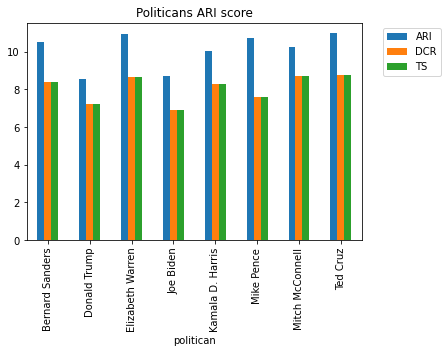

In [21]:
major_leaders_df2 = df_noRT[df_noRT['politican'].isin(major_leaders)]



major_leaders_df2['ARI'] = major_leaders_df2.tweet_web_r.apply(lambda x:textstat.automated_readability_index(x))
major_leaders_df2['DCR'] = major_leaders_df2.tweet_web_r.apply(lambda x:textstat.dale_chall_readability_score(x))
major_leaders_df2['TS'] = major_leaders_df2.tweet_web_r.apply(lambda x:textstat.dale_chall_readability_score(x))

major_leaders_df2.groupby('politican')[['ARI','DCR','TS']].mean().plot(kind = 'bar', title = 'Politicans ARI score')
plt.legend(bbox_to_anchor=(1.05, 1))


In [22]:
major_leaders_df2.groupby('politican')[['ARI','DCR','TS']].describe().T

politican  Bernard Sanders  Donald Trump  Elizabeth Warren   Joe Biden  \
ARI count       178.000000    110.000000        174.000000  191.000000   
    mean         10.519101      8.530000         10.933333    8.724084   
    std           3.757445      7.516435          3.736700    3.971603   
    min          -0.300000     -4.600000          2.200000   -3.500000   
    25%           7.950000      3.800000          7.600000    6.000000   
    50%          11.350000      8.350000         11.400000    9.700000   
    75%          13.200000     11.400000         13.500000   11.300000   
    max          22.800000     52.600000         20.600000   24.000000   
DCR count       178.000000    110.000000        174.000000  191.000000   
    mean          8.393539      7.218364          8.649253    6.894346   
    std           1.900513      3.984040          1.804331    2.822519   
    min           1.090000      0.000000          1.780000    0.100000   
    25%           7.160000      6.240000          7.290000    6.155000   
    50%           8.350000      7.160000          8.730000    7.050000   
    75%           9.570000      9.180000          9.757500    8.440000   
    max          14.000000     19.530000         12.840000   19.580000   
TS  count       178.000000    110.000000        174.000000  191.000000   
    mean          8.393539      7.218364          8.649253    6.894346   
    std           1.900513      3.984040          1.804331    2.822519   
    min           1.090000      0.000000          1.780000    0.100000   
    25%           7.160000      6.240000          7.290000    6.155000   
    50%           8.350000      7.160000          8.730000    7.050000   
    75%           9.570000      9.180000          9.757500    8.440000   
    max          14.000000     19.530000         12.840000   19.580000   

politican  Kamala D. Harris  Mike Pence  Mitch McConnell    Ted Cruz  
ARI count        150.000000   64.000000       194.000000  130.000000  
    mean          10.005333   10.710938        10.262371   10.986923  
    std            3.709226    3.744885         3.732559    4.023080  
    min            1.600000   -0.200000         2.600000    2.300000  
    25%            6.450000    8.650000         7.450000    8.500000  
    50%           10.550000   10.450000        10.600000   11.400000  
    75%           12.400000   13.500000        13.500000   13.500000  
    max           22.800000   18.100000        20.200000   20.200000  
DCR count        150.000000   64.000000       194.000000  130.000000  
    mean           8.276267    7.585156         8.677165    8.763538  
    std            1.810270    2.633799         1.992505    2.185630  
    min            1.260000    0.200000         1.260000    0.050000  
    25%            7.160000    6.370000         7.430000    7.537500  
    50%            7.900000    7.845000         8.870000    8.920000  
    75%            9.520000    8.970000         9.790000    9.950000  
    max           14.910000   14.130000        13.850000   14.760000  
TS  count        150.000000   64.000000       194.000000  130.000000  
    mean           8.276267    7.585156         8.677165    8.763538  
    std            1.810270    2.633799         1.992505    2.185630  
    min            1.260000    0.200000         1.260000    0.050000  
    25%            7.160000    6.370000         7.430000    7.537500  
    50%            7.900000    7.845000         8.870000    8.920000  
    75%            9.520000    8.970000         9.790000    9.950000  
    max           14.910000   14.130000        13.850000   14.760000

ok now this looks a little  bit different..  and trump ARI has decrease significantly

Now we will remove all the stop word

In [23]:
from nltk.corpus import stopwords

#nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df_noRT = df_noRT.reset_index(drop=True)
df_noRT['token'] = df_noRT.token.apply(lambda tokens: [w for w in tokens if not w in stop_words])
df_noRT

tweet       politican  \
0      Congrats to Petersburg Medical Center CEO Phil...  Lisa Murkowski   
1      The changes made by this legislation will go a...  Lisa Murkowski   
2      I’m proud to introduce the Tribal Health Data ...  Lisa Murkowski   
3      American Indian &amp; Alaska Native communitie...  Lisa Murkowski   
4      Congrats to Alaskans Eddy Falcon Jr. and Tafil...  Lisa Murkowski   
...                                                  ...             ...   
17119  Just stay focused, folks.\n\nLet’s get to work...       Joe Biden   
17120  Donald Trump is unfit to lead our nation. But ...       Joe Biden   
17121  .@realDonaldTrump it didn’t have to be this ba...       Joe Biden   
17122  The only person responsible for our failed COV...       Joe Biden   
17123  Together, united in our love for America and e...       Joe Biden   

      Party State  retweet                                        tweet_web_r  \
0         R   AK     False  Congrats to Petersburg Medical Center CEO Phil...   
1         R   AK     False  The changes made by this legislation will go a...   
2         R   AK     False  I’m proud to introduce the Tribal Health Data ...   
3         R   AK     False  American Indian &amp; Alaska Native communitie...   
4         R   AK     False  Congrats to Alaskans Eddy Falcon Jr. and Tafil...   
...     ...   ...      ...                                                ...   
17119     D     P    False  Just stay focused, folks.\n\nLet’s get to work...   
17120     D     P    False  Donald Trump is unfit to lead our nation. But ...   
17121     D     P    False  .@realDonaldTrump it didn’t have to be this bad.    
17122     D     P    False  The only person responsible for our failed COV...   
17123     D     P    False  Together, united in our love for America and e...   

        ARI    DCR    TS                                              punct  \
0      13.5   9.79  13.0  Congrats to Petersburg Medical Center CEO Phil...   
1      10.6   8.44  12.0  The changes made by this legislation will go a...   
2      14.8  10.98  10.0  Im proud to introduce the Tribal Health Data I...   
3      11.6   9.63  10.0  American Indian amp Alaska Native communities ...   
4      11.4  10.16  10.0  Congrats to Alaskans Eddy Falcon Jr and Tafili...   
...     ...    ...   ...                                                ...   
17119   4.9   6.78   2.0  Just stay focused folks\n\nLets get to work Jo...   
17120   1.4   6.99   3.0  Donald Trump is unfit to lead our nation But d...   
17121   6.7   7.98   8.0      realDonaldTrump it didnt have to be this bad    
17122   9.3   8.18   9.0  The only person responsible for our failed COV...   
17123  11.4   6.21  12.0  Together united in our love for America and ea...   

                                                   token  
0      [Congrats, Petersburg, Medical, Center, CEO, P...  
1      [The, changes, made, legislation, go, long, wa...  
2      [Im, proud, introduce, Tribal, Health, Data, I...  
3      [American, Indian, amp, Alaska, Native, commun...  
4      [Congrats, Alaskans, Eddy, Falcon, Jr, Tafilis...  
...                                                  ...  
17119  [Just, stay, focused, folks, Lets, get, work, ...  
17120  [Donald, Trump, unfit, lead, nation, But, dont...  
17121                      [realDonaldTrump, didnt, bad]  
17122  [The, person, responsible, failed, COVID, resp...  
17123  [Together, united, love, America, well, overco...  

[17124 rows x 11 columns]

Ok now for our last step we will perform stemming and lemming

In [26]:
from nltk.stem import WordNetLemmatizer 
#nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 
df_noRT['lem_token'] = df_noRT.token.apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])
df_noRT

#df_noRT.to_csv(one_level_up + '\\data\\processed\\09122020_processed_tweets.csv')

tweet       politican  \
0      Congrats to Petersburg Medical Center CEO Phil...  Lisa Murkowski   
1      The changes made by this legislation will go a...  Lisa Murkowski   
2      I’m proud to introduce the Tribal Health Data ...  Lisa Murkowski   
3      American Indian &amp; Alaska Native communitie...  Lisa Murkowski   
4      Congrats to Alaskans Eddy Falcon Jr. and Tafil...  Lisa Murkowski   
...                                                  ...             ...   
17119  Just stay focused, folks.\n\nLet’s get to work...       Joe Biden   
17120  Donald Trump is unfit to lead our nation. But ...       Joe Biden   
17121  .@realDonaldTrump it didn’t have to be this ba...       Joe Biden   
17122  The only person responsible for our failed COV...       Joe Biden   
17123  Together, united in our love for America and e...       Joe Biden   

      Party State  retweet                                        tweet_web_r  \
0         R   AK     False  Congrats to Petersburg Medical Center CEO Phil...   
1         R   AK     False  The changes made by this legislation will go a...   
2         R   AK     False  I’m proud to introduce the Tribal Health Data ...   
3         R   AK     False  American Indian &amp; Alaska Native communitie...   
4         R   AK     False  Congrats to Alaskans Eddy Falcon Jr. and Tafil...   
...     ...   ...      ...                                                ...   
17119     D     P    False  Just stay focused, folks.\n\nLet’s get to work...   
17120     D     P    False  Donald Trump is unfit to lead our nation. But ...   
17121     D     P    False  .@realDonaldTrump it didn’t have to be this bad.    
17122     D     P    False  The only person responsible for our failed COV...   
17123     D     P    False  Together, united in our love for America and e...   

        ARI    DCR    TS                                              punct  \
0      13.5   9.79  13.0  Congrats to Petersburg Medical Center CEO Phil...   
1      10.6   8.44  12.0  The changes made by this legislation will go a...   
2      14.8  10.98  10.0  Im proud to introduce the Tribal Health Data I...   
3      11.6   9.63  10.0  American Indian amp Alaska Native communities ...   
4      11.4  10.16  10.0  Congrats to Alaskans Eddy Falcon Jr and Tafili...   
...     ...    ...   ...                                                ...   
17119   4.9   6.78   2.0  Just stay focused folks\n\nLets get to work Jo...   
17120   1.4   6.99   3.0  Donald Trump is unfit to lead our nation But d...   
17121   6.7   7.98   8.0      realDonaldTrump it didnt have to be this bad    
17122   9.3   8.18   9.0  The only person responsible for our failed COV...   
17123  11.4   6.21  12.0  Together united in our love for America and ea...   

                                                   token  \
0      [Congrats, Petersburg, Medical, Center, CEO, P...   
1      [The, changes, made, legislation, go, long, wa...   
2      [Im, proud, introduce, Tribal, Health, Data, I...   
3      [American, Indian, amp, Alaska, Native, commun...   
4      [Congrats, Alaskans, Eddy, Falcon, Jr, Tafilis...   
...                                                  ...   
17119  [Just, stay, focused, folks, Lets, get, work, ...   
17120  [Donald, Trump, unfit, lead, nation, But, dont...   
17121                      [realDonaldTrump, didnt, bad]   
17122  [The, person, responsible, failed, COVID, resp...   
17123  [Together, united, love, America, well, overco...   

                                               lem_token  
0      [Congrats, Petersburg, Medical, Center, CEO, P...  
1      [The, change, made, legislation, go, long, way...  
2      [Im, proud, introduce, Tribal, Health, Data, I...  
3      [American, Indian, amp, Alaska, Native, commun...  
4      [Congrats, Alaskans, Eddy, Falcon, Jr, Tafilis...  
...                                                  ...  
17119  [Just, stay, focused, folk, Lets, get, work, J...  
17120  [Donald, Trump, 

## Handling Data From another date

In [33]:
date2_df = pd.read_csv(one_level_up + '\\data\\raw\\09222020_raw_tweets.csv', index_col= 0)

date2_df['retweet'] = date2_df['tweet'].str.contains('RT')
date2_df['tweet_web_r'] = date2_df.tweet.str.replace(r'http\S+','')
date2_df['ARI'] = date2_df.tweet_web_r.apply(lambda x:textstat.automated_readability_index(x))
date2_df['DCR'] = date2_df.tweet_web_r.apply(lambda x:textstat.dale_chall_readability_score(x))
date2_df['TS'] = date2_df.tweet_web_r.apply(lambda x:textstat.text_standard(x,float_output =True))
date2_df.replace('', np.nan,inplace = True)
date2_df.dropna(subset = ['tweet_web_r'],inplace = True)
date2_df['punct'] = date2_df.tweet_web_r.str.replace(pattern, '')
date2_df['punct'] = date2_df.punct.str.replace("’", "")
date2_df['token'] = date2_df.punct.apply(lambda x: word_tokenize(x))
date2_df = date2_df[date2_df['retweet'] == False]
date2_df = date2_df.reset_index(drop=True)
date2_df['token'] = date2_df.token.apply(lambda tokens: [w for w in tokens if not w in stop_words])
date2_df['lem_token'] = date2_df.token.apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])

date2_df.to_pickle(one_level_up + '\\data\\processed\\09222020_processed_tweets.pkl')
#date2_df['token'] = date2_df.punct.apply(lambda x: word_tokenize(x))
